In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_77537/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from patsy import dmatrix

In [3]:
ozone = pd.read_csv("../donnees/ozone.txt", header = 0, sep = ";", index_col=0)
X = ozone.iloc[:,1:10].to_numpy()
y = ozone["O3"].to_numpy()

In [4]:
cr = StandardScaler()
kf = KFold(n_splits=10, shuffle=True, random_state=0)

In [5]:
lassocv = LassoCV(cv=kf)
enetcv = ElasticNetCV(cv=kf)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])

In [6]:
pipe_lassocv.fit(X, y)
pipe_enetcv.fit(X, y)

Pipeline(steps=[('cr', StandardScaler()),
                ('enetcv',
                 ElasticNetCV(cv=KFold(n_splits=10, random_state=0, shuffle=True)))])

In [7]:
etape_lassocv = pipe_lassocv.named_steps["lassocv"]
etape_enetcv = pipe_enetcv.named_steps["enetcv"]

In [8]:
alphasridge = etape_lassocv.alphas_ * 100
ridgecv = RidgeCV(cv=kf, alphas=alphasridge)

In [9]:
pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
pipe_ridgecv.fit(X, y)

Pipeline(steps=[('cr', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.82214402e+03, 1.69933761e+03, 1.58480794e+03, 1.47799719e+03,
       1.37838513e+03, 1.28548658e+03, 1.19884909e+03, 1.11805068e+03,
       1.04269780e+03, 9.72423459e+02, 9.06885373e+02, 8.45764334e+02,
       7.88762649e+02, 7.35602686e+02, 6.86025527e+02, 6.39789702e+02,
       5.96670018e+02, 5.56456456e+02, 5.18953...
       6.86025527e+00, 6.39789702e+00, 5.96670018e+00, 5.56456456e+00,
       5.18953153e+00, 4.83977447e+00, 4.51358987e+00, 4.20938902e+00,
       3.92569029e+00, 3.66111190e+00, 3.41436521e+00, 3.18424843e+00,
       2.96964074e+00, 2.76949689e+00, 2.58284207e+00, 2.40876716e+00,
       2.24642431e+00, 2.09502283e+00, 1.95382531e+00, 1.82214402e+00]),
                         cv=KFold(n_splits=10, random_state=0, shuffle=True)))])

In [10]:
etape_ridgecv = pipe_ridgecv.named_steps["ridgecv"]

Text(0, 0.5, 'Coefficients')

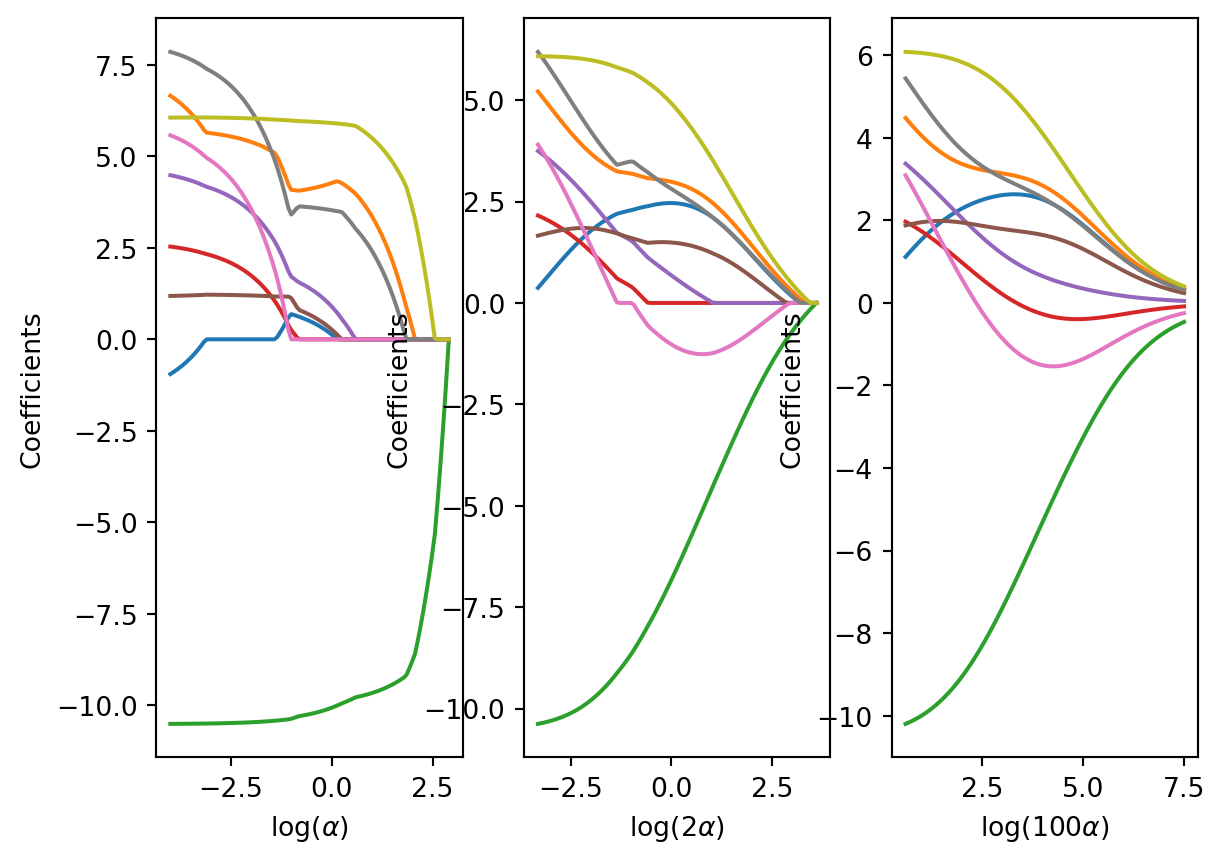

In [11]:
alphas = pipe_lassocv.named_steps["lassocv"].alphas_
coefs_lasso = []; coefs_enet = []; coefs_ridge = []
Xcr = StandardScaler().fit(X).transform(X)
for a in alphas:
    ## lasso
    lasso = Lasso(alpha=a, warm_start=True).fit(Xcr, y)
    coefs_lasso.append(lasso.coef_)
    ## enet
    enet = ElasticNet(alpha=a*2, warm_start=True).fit(Xcr, y)
    coefs_enet.append(enet.coef_)
    ## ridge
    ridge = Ridge(alpha=a*100).fit(Xcr, y)
    coefs_ridge.append(ridge.coef_)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(np.log(alphas), coefs_lasso)
ax1.set_xlabel(r'$\log(\alpha)$')
ax1.set_ylabel('Coefficients')
ax2.plot(np.log(2*alphas), coefs_enet)
ax2.set_xlabel(r'$\log(2\alpha)$')
ax2.set_ylabel('Coefficients')
ax3.plot(np.log(100*alphas), coefs_ridge)
ax3.set_xlabel(r'$\log(100\alpha)$')
ax3.set_ylabel('Coefficients')

In [12]:
print("Lasso: ", round(etape_lassocv.alpha_,4))
print("ElasticNet: ", round(etape_enetcv.alpha_,4))
print("Ridge: ", round(etape_ridgecv.alpha_,4))

Lasso:  0.7356
ElasticNet:  0.3399
Ridge:  9.0689


In [13]:
ozone = pd.read_csv("../donnees/ozone.txt", header = 0, sep = ";", index_col=0)
Xapp = ozone.iloc[0:45,1:10].to_numpy()
Xnew = ozone.iloc[45:50,1:10].to_numpy()
yapp = np.ravel(ozone.iloc[0:45,:1])
ynew = np.ravel(ozone.iloc[45:50,:1])

In [14]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
cr = StandardScaler()
lassocv = LassoCV(cv=kf)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
pipe_lassocv.fit(Xapp,yapp)

Pipeline(steps=[('cr', StandardScaler()),
                ('lassocv',
                 LassoCV(cv=KFold(n_splits=10, random_state=0, shuffle=True)))])

In [15]:
pipe_lassocv.predict(Xnew)

array([95.81725767, 63.675633  , 67.49560903, 67.57922292, 89.43629205])

In [16]:
ozone = pd.read_csv("../donnees/ozone.txt", header=0, sep=";", index_col=0)
ozone["vent"]=ozone["vent"].astype("category")
ozone["nebu"]=ozone["nebu"].astype("category")
ozonec = pd.get_dummies(ozone, dtype=int)

In [17]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
noms = list(ozone.iloc[:,1:].columns)
cr = StandardScaler()
lassocv = LassoCV(cv=kf)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])

In [18]:
X = np.asarray(ozonec)[:,1:]
y = ozone["O3"].to_numpy()
Xnew=X[[1, 2, 3, 4],:]

In [19]:
pipe_lassocv.fit(X,y)
pipe_lassocv.predict(Xnew)

array([85.06422382, 74.44276859, 76.89538748, 70.58104896])

In [20]:
formule = "~" + "+".join(noms[0:-1]) + "+C(vent,Treatment(1))"
Xq = dmatrix(formule, ozone, return_type="dataframe")
X = Xq.iloc[:,1:].to_numpy()
y = ozone["O3"].to_numpy()
Xnew = X[[1, 2, 3, 4], :]
pipe_lassocv.fit(X, np.ravel(y))
pipe_lassocv.predict(Xnew)

array([84.69861705, 74.15856997, 77.38406597, 70.53092829])

In [21]:
formule = "~" + "+".join(noms[0:-2]) + "+C(nebu,Sum)+C(vent,Sum)"
Xq = dmatrix(formule, ozone, return_type="dataframe")
X = Xq.iloc[:, 1:].to_numpy()
y = ozone.iloc[:, :1]
Xnew=X[[1, 2, 3, 4], :]
pipe_lassocv.fit(X, np.ravel(y))
pipe_lassocv.predict(Xnew)

array([89.7713843 , 75.12691045, 73.72269821, 70.61705993])